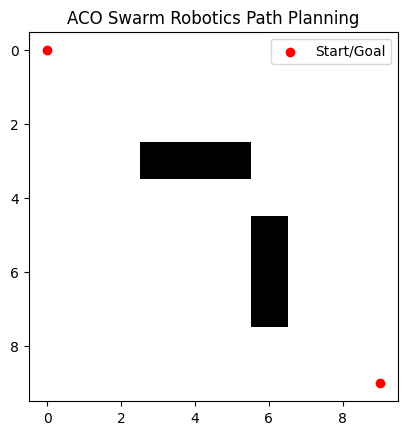

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define environment (10x10 grid with obstacles)
grid_size = (10, 10)
environment = np.zeros(grid_size)

# Add obstacles
obstacles = [(3, 3), (3, 4), (3, 5), (5, 6), (6, 6), (7, 6)]
for obs in obstacles:
    environment[obs] = 1  # Mark obstacles

# Define start and goal positions
start, goal = (0, 0), (9, 9)

class AntColonyOptimization:
    def __init__(self, environment, start, goal, n_ants=10, n_iterations=100, alpha=1, beta=2, evaporation=0.5, Q=1): # Changed _init_ to __init__
        """Initialize ACO parameters."""
        self.environment = environment
        self.start = start
        self.goal = goal
        self.grid_size = environment.shape
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha  # Pheromone influence
        self.beta = beta  # Heuristic influence
        self.evaporation = evaporation  # Pheromone evaporation rate
        self.Q = Q  # Pheromone deposit factor
        self.pheromone = np.ones(self.grid_size)  # Initialize pheromone levels

    # ... (rest of the class code remains the same)

    def get_neighbors(self, position):
        """Return valid neighbors (up, down, left, right)."""
        x, y = position
        neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
        return [n for n in neighbors if 0 <= n[0] < self.grid_size[0] and
                0 <= n[1] < self.grid_size[1] and self.environment[n] == 0]

    def move_ant(self, position):
        """Move ant based on pheromone levels and heuristic information."""
        neighbors = self.get_neighbors(position)
        if not neighbors:
            return position  # No valid moves, stay in place

        # Compute probabilities using pheromone levels and heuristic (distance to goal)
        pheromones = np.array([self.pheromone[n] for n in neighbors])
        heuristic = np.array([1 / (np.linalg.norm(np.array(n) - np.array(self.goal)) + 1e-5) for n in neighbors])
        probabilities = (pheromones ** self.alpha) * (heuristic ** self.beta)
        probabilities /= probabilities.sum()

        return random.choices(neighbors, probabilities)[0]  # Select next move

    def update_pheromones(self, paths):
        """Update pheromone levels based on paths taken by ants."""
        self.pheromone *= (1 - self.evaporation)  # Apply pheromone evaporation
        for path in paths:
            for pos in path:
                self.pheromone[pos] += self.Q / len(path)  # Deposit pheromone

    def optimize(self):
        """Run ACO algorithm to find the optimal path."""
        best_path = None
        best_length = float('inf')

        for _ in range(self.n_iterations):
            ant_paths = []
            for _ in range(self.n_ants):
                path = [self.start]
                while path[-1] != self.goal and len(path) < 100:
                    next_pos = self.move_ant(path[-1])
                    if next_pos in path:  # Avoid loops
                        break
                    path.append(next_pos)

                if path[-1] == self.goal and len(path) < best_length:
                    best_path, best_length = path[:], len(path)

                ant_paths.append(path)

            self.update_pheromones(ant_paths)

        return best_path

# Instantiate and run ACO
aco = AntColonyOptimization(environment, start, goal)
best_path = aco.optimize()

# Visualization
plt.imshow(environment, cmap='gray_r')
plt.scatter([start[1], goal[1]], [start[0], goal[0]], c='red', label="Start/Goal")
if best_path:
    path_x, path_y = zip(*best_path)
    plt.plot(path_y, path_x, marker='o', color='blue', label="ACO Best Path")
plt.legend()
plt.title("ACO Swarm Robotics Path Planning")
plt.show()

In [2]:
class AntColonyOptimization:
    def __init__(self, environment, start, goal, n_ants=10, n_iterations=100, alpha=1, beta=2, evaporation=0.5, Q=1): # Changed _init_ to __init__
        """Initialize ACO parameters."""
        self.environment = environment
        self.start = start
        self.goal = goal
        self.grid_size = environment.shape
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha  # Pheromone influence
        self.beta = beta  # Heuristic influence
        self.evaporation = evaporation  # Pheromone evaporation rate
        self.Q = Q  # Pheromone deposit factor
        self.pheromone = np.ones(self.grid_size)  # Initialize pheromone levels

    # ... (rest of the class code remains the same)